# **Import Python libraries.**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Import Datasets**

In [ ]:
train_data = pd.read_csv("Training.csv")
test_data = pd.read_csv("Testdata.csv")
print(train_data)
print(test_data)

# **Feature Engineering for Extracting information.**

In [ ]:
import re
#  directory generation for city, state and profession. 
#------------------------------------------------------
city =        list(train_data.city.unique())
profession =  list(train_data.profession.unique())
state =       list(train_data.state.unique())

def StringtTolist(lists):
    string = " "
    return string.join(lists)

def gen_dictionary(types): 
  
  types.sort()
  j = 1 
  dicts = {}
  for i in types:
    key = StringtTolist(re.split('[^A-Za-z]+', i))
    dicts[key] = j
    j+=1
  return dicts
#-------------------------------------------------------

city_dictionay = gen_dictionary(city)
#--------------------------------------------------------
profession_dictionary = gen_dictionary(profession)
state_dictionary= gen_dictionary(state)
print(city_dictionay)
print(profession_dictionary)
print(state_dictionary)




# Training Cleaning and mining data from Raw Data
# String Encoding into numeric order
# married: {single : 1, married:2}
# car_ownership:{'yes':1, 'no':2}
# house_ownership:{'norent_noown':1, 'owned':2, 'rented':3}
# city:{'Adoni': 1, 'Agartala': 2, 'Agra': 3, 'Ahmedabad': 4, 'Ahmednagar': 5, 'Aizawl': 6, ............... , 'Visakhapatnam ': 315, 'Warangal ': 316, 'Yamunanagar': 317}
# profession:{'Air traffic controller': 1, 'Analyst': 2, 'Architect': 3, 'Army officer': 4,.................,  'Technician': 49, 'Technology specialist': 50, 'Web designer': 51} 
# state:{'Andhra Pradesh': 1, 'Assam': 2, 'Bihar': 3, 'Chandigarh': 4,.....................'Uttar Pradesh ': 27, 'Uttarakhand': 28, 'West Bengal': 29}


Train_Data = train_data.copy(deep = True)
print(Train_Data.shape)

Train_Data['married'] = Train_Data['married'].replace(['single', 'married'], [1,2])
Train_Data['car_ownership'] = Train_Data['car_ownership'].replace(['yes', 'no'], [1,2])
Train_Data['house_ownership'] = Train_Data['house_ownership'].replace(['norent_noown', 'owned', 'rented'], [1,2,3])

for i in range(len(Train_Data)):
  key1 = StringtTolist(re.split('[^A-Za-z]+', Train_Data.city[i]))
  Train_Data.city[i] = city_dictionay[key1]

for i in range(len(Train_Data)):
  key2 = StringtTolist(re.split('[^A-Za-z]+',Train_Data.state[i]))
  Train_Data.state[i] = state_dictionary[key2]
for i in range(len(Train_Data)):
  key3 = StringtTolist(re.split('[^A-Za-z]+', Train_Data.profession[i]))
  Train_Data.profession[i]= profession_dictionary[key3]

  
# store new data in storage:

Train_Data.to_csv("CleanedTraining_Data")
Train_Data.shape


Test_Data = test_data.copy(deep = True)
print(Test_Data)

Test_Data['married'] = Test_Data['married'].replace(['single', 'married'], [1,2])
Test_Data['car_ownership'] = Test_Data['car_ownership'].replace(['yes', 'no'], [1,2])
Test_Data['house_ownership'] = Test_Data['house_ownership'].replace(['norent_noown', 'owned', 'rented'], [1,2,3])

for i in range(len(Test_Data)):
  key1 = StringtTolist(re.split('[^A-Za-z]+', Test_Data.city[i]))
  Test_Data.city[i] = city_dictionay[key1]

for i in range(len(Test_Data)): 
  key2 = StringtTolist(re.split('[^A-Za-z]+',Test_Data.state[i]))
  Test_Data.state[i] = state_dictionary[key2]
  
for i in range(len(Test_Data)):  
  key3 = StringtTolist(re.split('[^A-Za-z]+', Test_Data.profession[i]))
  Test_Data.profession[i]= profession_dictionary[key3]

  
Test_Data.to_csv("CleanedTest_Data")
Test_Data.head



## ** Dataset visualization. ***



In [4]:
#loading Data from the local directory
import pandas as pd
Train_DataXY = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Final_CleanedTraining_Data.csv")
Test_DataX =   pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final_CleanedTest_Data.csv')
# Delete index column or Id columns---------------------------------------------
del Train_DataXY[Train_DataXY.columns[0]] 
del Train_DataXY[Train_DataXY.columns[0]] 
del Test_DataX[Test_DataX.columns[0]]
del Test_DataX[Test_DataX.columns[0]]
column_head = list(Train_DataXY.columns.values)
print(column_head)


['income', 'age', 'experience', 'married', 'house_ownership', 'car_ownership', 'profession', 'city', 'state', 'current_job_years', 'current_house_years', 'risk_flag']


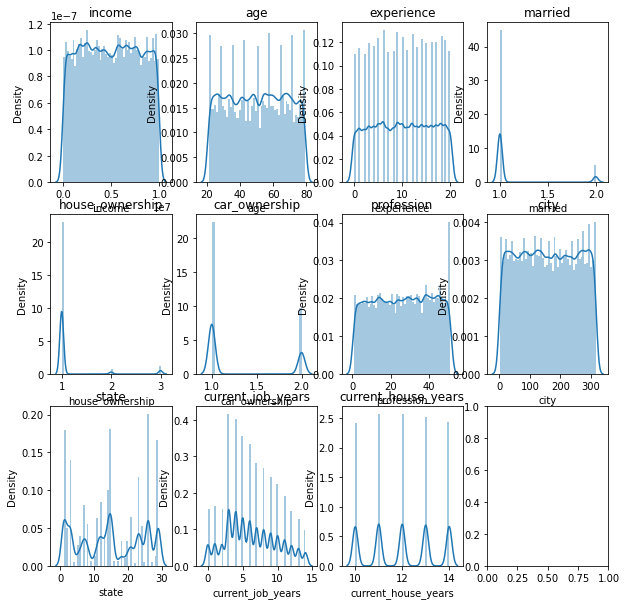

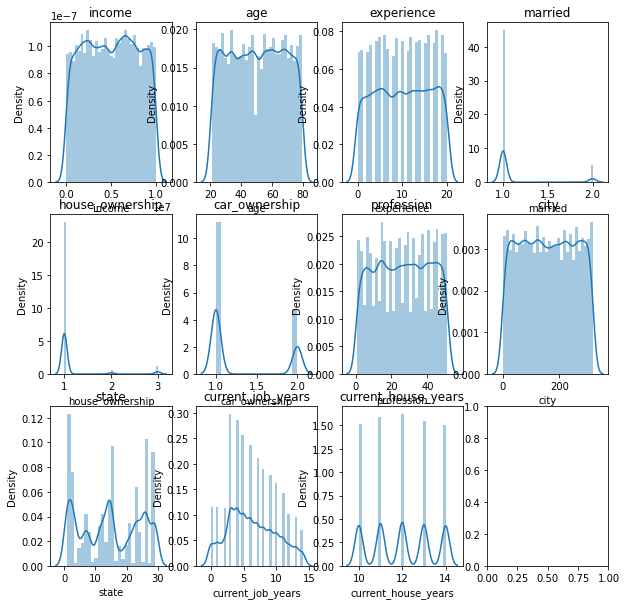

In [5]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import seaborn as sns
columns =Train_DataXY.columns.values
k =0
fig, ax = plt.subplots(3,4 , figsize=(10,10))
for i in range(3):
    for j in range(4):
        if k==11:
          break
        sns.distplot(Train_DataXY[columns[k]], ax=ax[i][j])
        ax[i][j].set_title(columns[k])
        k=k+1

columns =Test_DataX.columns.values
k =0
fig, ax = plt.subplots(3,4 , figsize=(10,10))
for i in range(3):
    for j in range(4):
        if k==11:
          break
        sns.distplot(Test_DataX[columns[k]], ax=ax[i][j])
        ax[i][j].set_title(columns[k])
        k=k+1

#Convert Dataset into numpy array

In [72]:
Training_Featurs = Train_DataXY.drop("risk_flag",axis=1).copy(deep=True)
Training_Targets = Train_DataXY["risk_flag"].copy(deep=True)
Testing_Features = Test_DataX.copy(deep=True)

Training_Featurs = Training_Featurs.to_numpy()
Training_Targets = Training_Targets.to_numpy()
Testing_Featurs =  Testing_Features.to_numpy()

# suffuling Data for sample randamness------------------------------------------ 
from scipy.sparse import coo_matrix
from sklearn.utils import shuffle
X_sparse = coo_matrix(Training_Featurs)
Training_Featurs, X_sparse, Training_Targets= shuffle(Training_Featurs, X_sparse, Training_Targets, random_state=0)
#-------------------------------------------------------------------------------

#inputDatamatrix =np.hstack((Training_Featurs,Testing_Featurs, Training_Targets))
print('Training_Featurs-:', Training_Featurs.shape)
print("Training_Targets-:" , Training_Targets.shape)
print("Testing_Featurs-:", Testing_Featurs.shape)





Training_Featurs-: (252000, 11)
Training_Targets-: (252000,)
Testing_Featurs-: (28000, 11)


# **KNN Algo for Binary Classification- 


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve


#trainX, testX, trainy, testy = train_test_split(Training_Featurs,Training_Targets,
#                                                    test_size=0.1, random_state=0)


#------------------------------------------------------------------------------------------------   
def binaryclaasification(treshold, y_probalistic):
    result =np.array(y_probalistic)
    j = 0
    for i in y_probalistic:
        if  i < treshold:
            result[j] = 0
        else:
            result[j] = 1 
        j+=1
    return result



def best_thresh(testy, predtesty):
    fpr, tpr, thresholds = roc_curve(testy,predtesty)
    J = tpr - fpr
    ix = argmax(J)
    return thresholds[ix]



def Data_StandardScaler_TVT(Train,validation, Test):
    
    from sklearn.preprocessing import StandardScaler
    
    scaler = StandardScaler()
    scaler.fit(Train)
    Trainx = scaler.transform(Train)
    validationx = scaler.transform(validation)
    Testx = scaler.transform(Test)
  
    return Trainx,validationx, Testx



def PCA_TVT(Data1,Data2,Data3, v = 0.95):
    from sklearn.decomposition import PCA
    pca = PCA(n_components = v)
    pca.fit(Data1)
    reduced_Data_Train = pca.transform(Data1)
    reduced_Data_val = pca.transform(Data2)
    reduced_Data_Test = pca.transform(Data3)
    print("New Data size after PCA", reduced_Data_Train.shape,reduced_Data_val, reduced_Data_Test.shape, )
    return  reduced_Data_Train,reduced_Data_val, reduced_Data_Test




def Data_StandardScaler_TV(Train,Test):
    
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(Train)
    Train = scaler.transform(Train)
    Test = scaler.transform(Test)
  
    return Train,Test



def PCA_TV(Data1,Data2, v = 0.95):
    from sklearn.decomposition import PCA
    pca = PCA(n_components = v)
    pca.fit(Data1)
    reduced_Data_Train = pca.transform(Data1)
    reduced_Data_Test = pca.transform(Data2)
    print("New Data size after PCA", reduced_Data_Train.shape,reduced_Data_Test.shape, )
    return  reduced_Data_Train,reduced_Data_Test

#------------------------------------
# predict probabilities

#trainX, testX= Data_StandardScaler(trainX, testX,)
#print(trainX.shape, testX.shape)




# ***Experiment stage***

# Training and validation_testing Data spliting 

In [8]:
import seaborn as sns
trainX, testX, trainy, testy = train_test_split(Training_Featurs,Training_Targets,test_size=0.1, random_state=0)

#trainX, testX = Data_StandardScaler_TV(trainX, testX)

# Hyper-parameter tuning

In [64]:
#Classifiation_report = {}
#Classifiation_report["Sensitivity"] =  []
#Classifiation_report['Specificity'] =     []
#Classifiation_report['Tresholds'] = []
#Classifiation_report['confusion matrix'] = []
#Classifiation_report['F-score'] = []
from sklearn.model_selection import StratifiedKFold
# perfom cross validation on the X_train & y_train 
from sklearn.model_selection import StratifiedKFold


skf = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)


#hyper parameter tuning---------------------------------------------------------
from sklearn.metrics import roc_auc_score
FscoreDict = {}

Neighbours = np.arange(22,50)
FscoreDict = []
for N in Neighbours:
    
    for weights in  ['distance', "uniform"]:
        for algo in ['ball_tree', 'kd_tree']:#,'brute']:
            for i in [1,2]:
                for leafs in [25,30,35, 40,50,60,70]:
                       
                        cv_score_mean=0
           
                        for train_index, test_index in skf.split(trainX, trainy):
                            print("Train:", train_index, "Test:", test_index)
                            X_train_cv, X_test_cv = trainX[train_index], trainX[test_index]
                            y_train_cv, y_test_cv = trainy[train_index], trainy[test_index]

                            model = KNeighborsClassifier(n_neighbors=N ,weights = weights,algorithm = algo, leaf_size = leafs,p = i)
                            model.fit(X_train_cv,y_train_cv)

                            y_test_pred= model.predict_proba(testX)
                            cv_score= roc_auc_score(y_true=testy,y_score=y_test_pred[:,1])
                            cv_score_mean=cv_score_mean+cv_score
                            #best_thresh1 = best_thresh(testy,y_test_pred[:,1)

                        print("-------------------------------------------Number of neighbours-{}---------------------------------------------------")
                        #print(trainX.shape, testX.shape)
                      
                        #model =RandomForestClassifier(n_estimators= 100, min_samples_leaf= 5, max_features= sqrt)
                        #model = KNeighborsClassifier(n_neighbors=N ,weights = weights,algorithm = algo, leaf_size = leafs,p = i)
                        #X_ros,y_ros = sm.fit_resample(trainX,trainy) 
                        #X_ros,y_ros = ros.fit_resample(X_ros,y_ros) 
                        ###proba_y = model.predict_proba(testX)
                        #Targety = model.predict(testX)
                        #logistic_y = proba_y[:,1]
                        # keep probabilities for the positive outcome only
                        # calculate roc curves
                        #fpr, tpr, thresholds = roc_curve(testy,logistic_y)
                        #gmeans = sqrt(tpr * (1-fpr))
                        #ix = argmax(gmeans)
                        #best_thresh1 = best_thresh(testy,logistic_y)
                        #print('Best Threshold=%f' % ( best_thresh1))
                        
                        #Classifiation_report['Tresholds'].append(best_thresh1)

                        #test_Discion = binaryclaasification(best_thresh1,logistic_y)
                    
                        
                        #cv_score= roc_auc_score(y_true=testy, y_score=logistic_y)
                        FscoreDict.append([ N, cv_score_mean/3, weights, algo, leafs ,i, best_thresh1 ])

                        print("|n_neighbors=",N , " |RUC-score=> ",  cv_score_mean/3," |weights=>",  weights,"|Algo=>", algo," |leafs=>" , leafs ,'|distance =>', i)# "|best_thresh1=> ", best_thresh1 ) 

        
    
#pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
#pyplot.plot(fpr, tpr, marker='.', label='Logistic'+ str(best_thresh1))
# axis labels
#pyplot.xlabel('False Positive Rate')
#pyplot.ylabel('True Positive Rate')
#pyplot.legend()
#show()
#print(confusion_matrix(testy,test_Discion))
#print(classification_report(testy, test_Discion))
#print("Accuracy_Score", accuracy_score(testy, test_Discion))
#print("#------------------------------------------------------------------------------------------------")  
#tn, fp, fn, tp = confusion_matrix(testy, test_Discion).ravel()
#Senstivity = tp/(tp+fn)
#Specificity = tn/(tn+fp)

#Classifiation_report["Sensitivity"].append(Senstivity)
#Classifiation_report['Specificity'].append(Specificity)
#Classifiation_report['confusion matrix'].append([ tn, fp, fn, tp])


Streaming output truncated to the last 5000 lines.
Train: [ 75472  75473  75474 ... 226797 226798 226799] Test: [    0     1     2 ... 76494 76504 76506]
Train: [     0      1      2 ... 226797 226798 226799] Test: [ 75472  75473  75474 ... 151253 151255 151262]
Train: [     0      1      2 ... 151253 151255 151262] Test: [151190 151192 151193 ... 226797 226798 226799]
-------------------------------------------Number of neighbours-{}---------------------------------------------------
|n_neighbors= 32  |RUC-score=>  0.9182158809756261  |weights=> distance |Algo=> ball_tree  |leafs=> 30 |distance => 2
Train: [ 75472  75473  75474 ... 226797 226798 226799] Test: [    0     1     2 ... 76494 76504 76506]
Train: [     0      1      2 ... 226797 226798 226799] Test: [ 75472  75473  75474 ... 151253 151255 151262]
Train: [     0      1      2 ... 151253 151255 151262] Test: [151190 151192 151193 ... 226797 226798 226799]
-------------------------------------------Number of neighbours-{}-----

# Selecction for maximum RUC curve score

In [66]:

FscoreDict = pd.DataFrame(FscoreDict, columns = ["N","Fscore", "weights", "Algo", "leafs", " distace matrix", "best_thresh1"])
FscoreDict.to_csv('K-fFscoreDict90'+ str('22to50')+'.csv')
FscoreDict.sort_values('Fscore',ascending=False)


,N,Fscore,weights,Algo,leafs,distace matrix,best_thresh1
1532,49,0.926343,distance,kd_tree,70,1,0.066667
1531,49,0.926343,distance,kd_tree,60,1,0.066667
1529,49,0.926343,distance,kd_tree,40,1,0.066667
1530,49,0.926343,distance,kd_tree,50,1,0.066667
1515,49,0.926342,distance,ball_tree,40,1,0.066667
...,...,...,...,...,...,...,...
1541,49,0.820172,uniform,ball_tree,30,1,0.066667
1540,49,0.820172,uniform,ball_tree,25,1,0.066667
1555,49,0.820123,uniform,kd_tree,30,1,0.066667
1554,49,0.820123,uniform,kd_tree,25,1,0.066667


# Best model Selection 


1.   4   0.868002	uniform	ball_tree	25	1	0.333333
2.   3	 0.845609419803015	distance	kd_tree	25	2	0.3333333333333333
3.   5   0.880268	uniform	ball_tree	25	1	0.333333
4.   6	 0.8862724355080536	uniform	kd_tree	25	1	0.3333333333333333
5.	 7	 0.8908704491663483	uniform	kd_tree	25	1	0.3333333333333333
6.   8   0.8933318647519489	uniform	ball_tree	40	1	0.3333333333333333
7.   9	 0.8949667276054756	uniform	kd_tree	25	1	0.3333333333333333
8.   10	 0.8963326717398591	uniform	kd_tree	25	1	0.3333333333333333
9.   11	 0.8967219946165027	uniform	kd_tree	25	1	0.3333333333333333
10.  12	 0.897071714585843	uniform	kd_tree	40	1	0.3333333333333333
11.  14	 0.8973669287181821	distance	kd_tree	40	1	0.3333333333333333
12.  15	 0.8976690905578022	distance	kd_tree	25	1	0.3333333333333333
13.  17	 0.898258623524527	distance	ball_tree	40	1	0.3333333333333333
14.  22	 0.9024046117358683	distance	kd_tree	40	1	0.3333333333333333
49.	0.926343	distance	kd_tree	70	1	



# Over sampling for imbalance data 

1.   SOMT oversampling
2.   Randam over sampling
3.   ADASYN oversampling



In [51]:
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn import over_sampling
#Sampling process---------------------------------------------------------------- 
ada = over_sampling.ADASYN(sampling_strategy='minority', random_state=42)
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
sm = over_sampling.SMOTE(sampling_strategy='minority', random_state=42)


#without oversampling 

-------------------------------------------Number of neighbours-{}---------------------------------------------------
(226800, 11) (25200, 11)


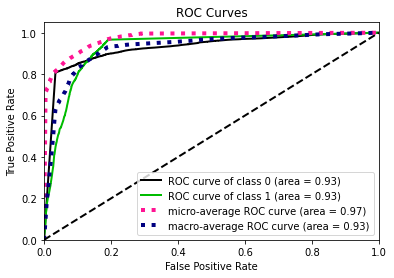

cv_score 0.9267514150342727
Best Threshold=0.007216
[[17901  4209]
 [  109  2981]]
              precision    recall  f1-score   support

           0       0.99      0.81      0.89     22110
           1       0.41      0.96      0.58      3090

    accuracy                           0.83     25200
   macro avg       0.70      0.89      0.74     25200
weighted avg       0.92      0.83      0.85     25200



In [67]:
import scikitplot
from sklearn.metrics import roc_auc_score
N = 49

print("-------------------------------------------Number of neighbours-{}---------------------------------------------------")
print(trainX.shape, testX.shape)
model = KNeighborsClassifier(n_neighbors=49 ,weights = "distance",algorithm = 'kd_tree', leaf_size = 70 ,p =1)
model.fit(trainX, trainy) 

proba_y = model.predict_proba(testX)
scikitplot.metrics.plot_roc(testy,proba_y)
plt.show()
cv_score= roc_auc_score(y_true=testy, y_score=proba_y[:,1])
print('cv_score', cv_score)

best_thresh1 = best_thresh(testy,proba_y[:,1])
#---------------------------------------------------------------------------------------------------

print('Best Threshold=%f' % ( best_thresh1))

test_Discion = binaryclaasification(best_thresh1,proba_y[:,1])


print(confusion_matrix(testy,test_Discion))
print(classification_report(testy, test_Discion))

#Random oversampling 

-------------------------------------------Number of neighbours-{}---------------------------------------------------
(226800, 11) (25200, 11)


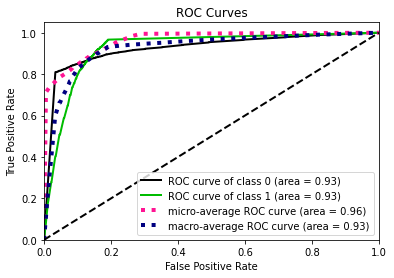

cv_score 0.9251303500151494
Best Threshold=0.031797
[[17905  4205]
 [  106  2984]]
              precision    recall  f1-score   support

           0       0.99      0.81      0.89     22110
           1       0.42      0.97      0.58      3090

    accuracy                           0.83     25200
   macro avg       0.70      0.89      0.74     25200
weighted avg       0.92      0.83      0.85     25200



In [68]:
import scikitplot
from sklearn.metrics import roc_auc_score
N = 49

print("-------------------------------------------Number of neighbours-{}---------------------------------------------------")
print(trainX.shape, testX.shape)
model = KNeighborsClassifier(n_neighbors=49 ,weights = "distance",algorithm = 'kd_tree', leaf_size = 70 ,p =1)
X_ros,y_ros = ros.fit_resample(trainX,trainy) 
model.fit(X_ros,y_ros) 
#model.fit(trainX, trainy) 

proba_y = model.predict_proba(testX)
scikitplot.metrics.plot_roc(testy,proba_y)
plt.show()
cv_score= roc_auc_score(y_true=testy, y_score=proba_y[:,1])
print('cv_score', cv_score)

best_thresh1 = best_thresh(testy,proba_y[:,1])
#---------------------------------------------------------------------------------------------------

print('Best Threshold=%f' % ( best_thresh1))

test_Discion = binaryclaasification(best_thresh1,proba_y[:,1])


print(confusion_matrix(testy,test_Discion))
print(classification_report(testy, test_Discion))

# ADASYN oversampling analysis 


-------------------------------------------Number of neighbours-{}---------------------------------------------------
(226800, 11) (25200, 11)


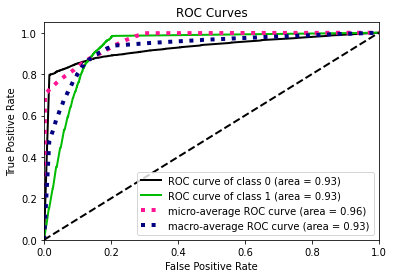

cv_score 0.9255096465305133
Best Threshold=0.007216
[[17610  4500]
 [   48  3042]]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89     22110
           1       0.40      0.98      0.57      3090

    accuracy                           0.82     25200
   macro avg       0.70      0.89      0.73     25200
weighted avg       0.92      0.82      0.85     25200



In [69]:
import scikitplot
from sklearn.metrics import roc_auc_score
N = 22

print("-------------------------------------------Number of neighbours-{}---------------------------------------------------")
print(trainX.shape, testX.shape)
model = KNeighborsClassifier(n_neighbors=49 ,weights = "distance",algorithm = 'kd_tree', leaf_size = 70 ,p =1)
X_ada,y_ada = ada.fit_resample(trainX,trainy) 
model.fit(X_ada,y_ada) 
#model.fit(trainX, trainy) 

proba_y = model.predict_proba(testX)
scikitplot.metrics.plot_roc(testy,proba_y)
plt.show()
cv_score= roc_auc_score(y_true=testy, y_score=proba_y[:,1])
print('cv_score', cv_score)

best_thresh1 = best_thresh(testy,proba_y[:,1])
#---------------------------------------------------------------------------------------------------

print('Best Threshold=%f' % ( best_thresh1))

test_Discion = binaryclaasification(best_thresh1,proba_y[:,1])


print(confusion_matrix(testy,test_Discion))
print(classification_report(testy, test_Discion))

# SOMAT oversampling analysis

-------------------------------------------Number of neighbours-{}---------------------------------------------------
(226800, 11) (25200, 11)


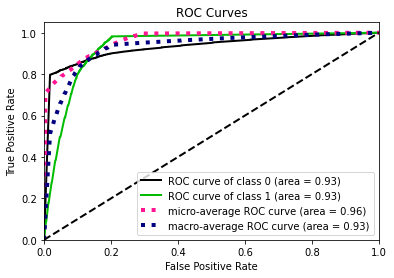

cv_score 0.9300798522831564
Best Threshold=0.004465
[[17629  4481]
 [   55  3035]]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89     22110
           1       0.40      0.98      0.57      3090

    accuracy                           0.82     25200
   macro avg       0.70      0.89      0.73     25200
weighted avg       0.92      0.82      0.85     25200



In [70]:
import scikitplot
from sklearn.metrics import roc_auc_score
N = 22

print("-------------------------------------------Number of neighbours-{}---------------------------------------------------")
print(trainX.shape, testX.shape)
model = KNeighborsClassifier(n_neighbors=49 ,weights = "distance",algorithm = 'kd_tree', leaf_size = 70 ,p =1)
X_sm,y_sm = sm.fit_resample(trainX,trainy) 
model.fit(X_sm,y_sm) 
#model.fit(trainX, trainy) 

proba_y = model.predict_proba(testX)
scikitplot.metrics.plot_roc(testy,proba_y)
plt.show()
cv_score= roc_auc_score(y_true=testy, y_score=proba_y[:,1])
print('cv_score', cv_score)

best_thresh1 = best_thresh(testy,proba_y[:,1])
#---------------------------------------------------------------------------------------------------

print('Best Threshold=%f' % ( best_thresh1))

test_Discion = binaryclaasification(best_thresh1,proba_y[:,1])


print(confusion_matrix(testy,test_Discion))
print(classification_report(testy, test_Discion))

# ***Prediction Stage***

# ***Pridiction test Target and storing output data in drive***

# SOMAT sampling give higer RUC score- 0.9152736757518675

-------------------------------------------Number of neighbours-{}---------------------------------------------------
(226800, 11) (25200, 11)


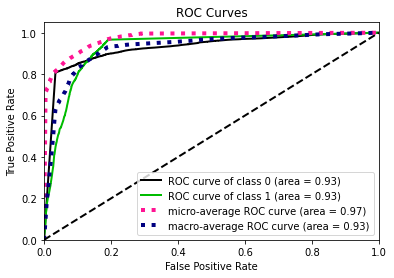

cv_score 0.9267514150342727
Best Threshold=0.007216
[[17901  4209]
 [  109  2981]]
              precision    recall  f1-score   support

           0       0.99      0.81      0.89     22110
           1       0.41      0.96      0.58      3090

    accuracy                           0.83     25200
   macro avg       0.70      0.89      0.74     25200
weighted avg       0.92      0.83      0.85     25200

|n_neighbors= 49  |RUC-score=>  0.9267514150342727 |best_thresh1=>  0.0072159100765607186
[0. 0. 0. ... 0. 1. 1.]
your output Data is successfully saved


In [71]:
import scikitplot
from sklearn.metrics import roc_auc_score
N = 49

print("-------------------------------------------Number of neighbours-{}---------------------------------------------------")
print(trainX.shape, testX.shape)
model = KNeighborsClassifier(n_neighbors=49 ,weights = "distance",algorithm = 'kd_tree', leaf_size = 70 ,p =1)# ,weights = "distance",algorithm = 'kd_tree', leaf_size = 40 ,p =1)
X_sm,y_sm = sm.fit_resample(trainX,trainy) 
#model.fit(X_sm,y_sm) 
model.fit(trainX, trainy) 

proba_y = model.predict_proba(testX)
scikitplot.metrics.plot_roc(testy,proba_y)
plt.show()
cv_score= roc_auc_score(y_true=testy, y_score=proba_y[:,1])
print('cv_score', cv_score)

best_thresh1 = best_thresh(testy,proba_y[:,1])
#---------------------------------------------------------------------------------------------------

print('Best Threshold=%f' % ( best_thresh1))

test_Discion = binaryclaasification(best_thresh1,proba_y[:,1])


print(confusion_matrix(testy,test_Discion))
print(classification_report(testy, test_Discion))



print("|n_neighbors=",N , " |RUC-score=> ",  cv_score, "|best_thresh1=> ", best_thresh1 ) 


#--------------------------------------------Prediction------------------------------------------


Test_targets_Proba = model.predict_proba(Testing_Featurs) 


#logistic Decision making by using best_threshold.............................................
Test_targets_Probay = Test_targets_Proba[:,1]
y_logistic_pridiction = binaryclaasification( best_thresh1, Test_targets_Probay)
print(y_logistic_pridiction)

Y_Test = pd.DataFrame(y_logistic_pridiction, columns=["risk_flag"])
Y_Test.index.name = "id"
Y_Test.index+=1
Y_Test = Y_Test.risk_flag.astype(int)
Y_Test.to_csv("TDesisionKNN(15-40-d-K-1roc-somt)" + str(N) +" .csv")
print("your output Data is successfully saved")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
